
# PS2: Mini-batch SGD, CNN, and RNN

Advanced Learning 2024/5.


Last updated: 2024-12-26


For SUBMISSION:   

Please upload the complete and executed `ipynb` to your git repository. Verify that all of your output can be viewed directly from github, and provide a link to that git file below.

~~~
STUDENT ID: 205437643
~~~

~~~
STUDENT GIT LINK: https://github.com/DavidOriel/Adv.-computational-learning-and-data-analysis---52025

In Addition, don't forget to add your ID to the files, and upload to moodle the html version:    
  
`PS2_CNN_RNN_2024_ID_[205437643].html`   




---


Imports:

In [14]:
import numpy as np # You are allowed to use  only numpy.
import time, sys, cProfile
import matplotlib.pyplot as plt

Please import the objects in `src.py` file into the workspace

In [15]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
your_drive_path_to_src_file = "/content/drive/MyDrive/adv_learning/"
sys.path.append(your_drive_path_to_src_file)


In [17]:
from  src import *

Training on 10,000 samples:
Training epoch 1/10   error=0.043242
Training epoch 2/10   error=0.024665
Training epoch 3/10   error=0.018965
Training epoch 4/10   error=0.015611
Training epoch 5/10   error=0.013704
Training epoch 6/10   error=0.012018
Training epoch 7/10   error=0.011011
Training epoch 8/10   error=0.009988
Training epoch 9/10   error=0.009193
Training epoch 10/10   error=0.008411
Total process time: 99.147


Note that now all of the network's objects from PS1 are loaded into the workspace.

---

### 0. Loading data

As in PS1, you will evaluate your home-made network on the `mnist` dataset.   
The MNIST dataset is a large dataset of handwritten digits that is commonly used for training various image and vision models.  



In [18]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

---

## PS2 Part 1: Mini-batch SGD



**Welcome back**.   






Mini-batch Stochastic Gradient Descent (Mini-batch SGD) is an optimization algorithm used to train machine learning models, particularly neural networks. It strikes a balance between two other methods:

    Batch Gradient Descent – Uses the entire dataset to compute gradients and update the model parameters.
        ✅ Accurate gradients
        ❌ Slow and memory-intensive for large datasets

    Stochastic Gradient Descent (SGD) – Uses a single data point to compute gradients for each update.
        ✅ Fast and efficient
        ❌ Noisy updates, which can lead to instability

  
**Mini-batch SGD**.

Mini-batch SGD computes gradients and updates the model parameters using small, randomly selected batches of data (typically 32, 64, or 128 samples).

    ✅ Faster than batch gradient descent
    ✅ Less noisy than pure SGD
    ✅ Efficient use of memory
    ✅ Enables vectorization for faster computation on GPUs

**How it Works**.

    Shuffle the dataset to avoid bias.

    Divide the data into small batches (e.g., 64 samples per batch).

    For each epoch, iterate through the mini-batches:
        Perform forward pass to calculate predictions.
        Compute the loss for the mini-batch.
        Perform backpropagation to compute gradients.
        Update model parameters using the gradients.

    Repeat until the model converges.

**Algorithm**

For each mini-batch $B={x_1,x_2,...,x_m}B={x_1​,x_2​,...,x_m​}$ of size $m$, update the weights $w$ as:    

$$
w=w−η⋅\frac{1}{m}∑_{i=1}^m ∇L(w,x_i)
$$

Where:   
*  $η$ = learning rate.
* $∇L(w,x_i)$ = gradient of the loss for sample $x_i$.   

Advantages

    Efficient and scalable – Works well with large datasets.
    Smooth convergence – Less noisy than SGD but faster than full batch training.
    Parallelization – Batches can be processed in parallel on GPUs.

Disadvantages

    Choosing batch size can affect performance. Small batches lead to noise, large batches consume more memory.
    Convergence may be slower than batch gradient descent for some problems.


### Mini-batch Questions.
**P1Q1**:  

Please answer the following questions providing statistical justifications and mathematical formulas when needed.

P1Q1a: Explain how the mini-batch size impacts convergence, model performance, and computational efficiency.



When we are using smaller size batches the convergence will be longer since the noise will be bigger. For each batch we are using very small portion of the data to approximate the true gradient.
Moreover since we are using GPUs smaller batches will not utilize the full computational capabilities of the GPUs.
Also the training time itself will take longer.
In the other hand smaller batches prevent overfitting because we use less data per epoch, comparing to big size batches. So the model performance at the end can be better.  





**P1Q1b:**   
Why does mini-batch SGD require a learning rate schedule, and what are the common scheduling strategies?



In general, nummerically, the convergence at first will be faster and after getting near the optimal the convergence is slower, so at the beginning we would like to make big steps toward the optimal value and after some steps we would like to make smaller steps. Common strategy is to use a decay factor, for example: $\eta_t = η_0 ⋅ e^{-λt}$ \
where λ is the decay factor and $n_t$ is the learning rate for step t.

P1Q1c: What role does batch normalization play in mini-batch SGD, and why is it essential for deep neural networks?



We already specified that the variance in mini batches is relativley
high, so if we want to train our model, the activations output can be influenced from high (or low) value outliers, and this can lead to unstable training, causing gradients to fluctuate dramatically. So our training time will be long and this could even lead to unstable weight updates.
The solution is to normalize the output of the activation layers, and so the next layer will get normalize values and not high variance values with outliers.
Normalize is essential in deep neural networks where we have many layers and the gradients can be influence from many variables.




P1Q1d: How does mini-batch SGD differ in performance compared to full-batch gradient descent when dealing with non-convex optimization problems?



The problem in non- convex optimization problems is that it is possible to have many local minima and saddle points. When using full batch gradient descent over non convex problem we could converge to local minima, and not a global minima, and we are very depend on the starting point. When using a mini-batch SGD, because the variance is high we can skip over a local minima (or saddle point) and the probability to get to global minima instead is higher, it "explores" the solution landscape better.

P1Q1e: How does mini-batch SGD perform when training on imbalanced datasets, and what strategies can mitigate its challenges?



Imbalanced datasets is where there is a non-uniform distribution of samples among different classes in the dataset. Because the batch size are small there will be bias toward the majority class causing model optimization to be more towards the majority class and ignore the minority classes (yes, just like in democracies).
For mitigate the challenge we can force the batch to have some samples from the minority classes, or set higher values for the minority classes samples.

P1Q1f: Explain why larger mini-batch sizes are preferred during inference but not necessarily during training.


The answer includes everything we discussed in the previous questions. Unlike training, the goal of inference is not to update model parameters but to efficiently compute predictions. We prefer to have larger datasets in the batch so that the inference process benefits from processing many data points simultaneously, resulting in outputs that better reflect what we expect as the predicted values. On the other hand, we observed that training with smaller mini-batch sizes has advantages over larger batches, including better convergence to global minima and reduced overfitting.

### Applying mini-batch SGD

Preparing the data:

In [19]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

P1Q2a:  

Add a new function to the class `MyNetwork` named `fit_mini_batch`. This function should be similar to `fit`, just with a mini-batch SGD implementation. You can also make other code changes to the scripts in `src` if you think they are needed. In addition, add a suitable learning rate scheduler of your choice.   


YOU SHOULD (a) add the missing script to the src code, and (b) make a copy of the function  below for review:

In [20]:
def fit_mini_batch(self, x_train, y_train, batch_size, epochs, learning_rate):
  """
  Trains the network using mini-batch gradient descent.

  Parameters:
    x_train : np.array
        Training data.
    y_train : np.array
        Training labels.
    batch_size : int
        Size of each mini-batch.
    epochs : int
        Number of training epochs.
    learning_rate : float
        Learning rate for updating the weights.
  """
  samples = len(x_train)
  print("Training on {:,} samples:".format(samples))

  for epoch in range(epochs):
      # Shuffle the dataset
      indices = np.random.permutation(samples)
      x = x_train[indices]
      y = y_train[indices]
      epoch_error = 0
      for i in range(0, samples, batch_size):
          x_batch = x[i:i + batch_size]
          y_batch = y[i:i + batch_size]

          batch_error = 0
          for j in range(len(x_batch)):
              output = x_batch[j]
              for layer in self.layers:
                  output = layer.forward_propagation(output)
              batch_error += self.loss(y_batch[j], output)
              grad = self.loss_grad(y_batch[j], output)
              for layer in reversed(self.layers):
                  grad = layer.backward_propagation(grad, learning_rate)
          batch_error /= len(x_batch)
          epoch_error += batch_error
      epoch_error /= (samples / batch_size)
      print("Training epoch %d/%d   error=%f" % (epoch + 1, epochs, epoch_error))


    Test the two networks below to compare the differences between GD and mini-batch SGD:

In [21]:
#### GD implementaiton ####

# Network Architecture
netGD = MyNetwork()


netGD.add(Affine_Layer(28*28, 128))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(128, 64))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(64, 10))
netGD.add(ActivationLayer(tanh, tanh_grad))

netGD.use_loss(mse, mse_grad)


epoch_num = 10
lr = 0.05
t1 = time.time()
netGD.fit(x_train[:10000], y_train[:10000], epochs=epoch_num, learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 10,000 samples:
Training epoch 1/10   error=0.041676
Training epoch 2/10   error=0.023884
Training epoch 3/10   error=0.018509
Training epoch 4/10   error=0.015531
Training epoch 5/10   error=0.013533
Training epoch 6/10   error=0.012063
Training epoch 7/10   error=0.010907
Training epoch 8/10   error=0.009948
Training epoch 9/10   error=0.009130
Training epoch 10/10   error=0.008424
Total process time: 83.361


In [22]:
output_GD = netGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0116, Accuracy: 9398/10000 (94%)



In [23]:
#### mini-batch SGD implementaiton ####

# Network Architecture
netMiniGD = MyNetwork()


netMiniGD.add(Affine_Layer(28*28, 128))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(128, 64))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(64, 10))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))

netMiniGD.use_loss(mse, mse_grad)


epoch_num = 10
lr_sched = 0.05 # add a learning rate scheduler of your choice here
t2 = time.time()
netMiniGD.fit_mini_batch(x_train[:10000], y_train[:10000], batch_size=128, epochs=epoch_num, learning_rate=lr_sched)
print(f"Total process time: {round(time.time() - t2,3)}")


Training on 10,000 samples:
Training epoch 1/10   error=0.043305
Training epoch 2/10   error=0.025349
Training epoch 3/10   error=0.019513
Training epoch 4/10   error=0.016074
Training epoch 5/10   error=0.013954
Training epoch 6/10   error=0.012462
Training epoch 7/10   error=0.011217
Training epoch 8/10   error=0.010242
Training epoch 9/10   error=0.009301
Training epoch 10/10   error=0.008418
Total process time: 88.968


In [24]:
outputMiniGSD = netMiniGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0111, Accuracy: 9441/10000 (94%)



P1Q2b:   
Please answer the following:
* Which implementation was faster?
* with lower training error?
* with better test accuracy?    

and explain how these results fit your answers in Q1A.

Training the regular model was faster than training the mini-batch model. As we discussed, mini-batch training takes longer because it has more noise. On the other hand, the mini-batch model had less error, and its accuracy was slightly higher than that of the regular model. As we observed in previous answers, the mini-batch model tends to produce better results than regular gradient descent.
    

## PS2 Part 2: CNN



A Convolutional Neural Network (CNN) is a type of a deep neural network that can perform well at image recognition and analysis tasks.


> In this problem set we will add CNN compatibility to our numpy-based neural network from PS 1.

The main components needed to implement a CNN architecture:  

**Convolution layer:** In the convolutional layers, filters are applied to the image to identify patterns and features. Imagine a sliding window that moves across the image, detecting edges, shapes, and other building blocks.  

**Pooling layer:** Pooling layers downsample the data, reducing its complexity and computational cost. This helps prevent overfitting, where the model memorizes training data instead of learning generalizable patterns.  

**Reshape layer:**
Reshaping the output of the convolution and pooling layers into the fully connected layer.   


A USEFUL HINT:

*Keeping account of the input and output shapes along the CNN network is crucial for the model to work as intended*



Useful resource:  
* [CS231](https://cs231n.github.io/convolutional-networks/).
* [Convolutional Neural Network From Scratch](https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch).
* [CNN with PyTorch](https://www.kaggle.com/code/sdelecourt/cnn-with-pytorch-for-mnist)

#### Data transformations





(Here I added a reshape that I originally intended for you to apply at model time).

In [25]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],1,
                          x_train.shape[1],x_train.shape[2])
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
y_train = y_train.reshape(y_train.shape[0],1,
                          y_train.shape[1])

# same for test data : 10000 samples
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],1,
                          x_test.shape[1],x_test.shape[2])
y_test = to_categorical(y_test)
y_test = y_test.reshape(y_test.shape[0],1,
                          y_test.shape[1])

In [27]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (60000, 1, 28, 28)
x_test shape (10000, 1, 28, 28)
y_train shape (60000, 1, 10)
y_test shape (10000, 1, 10)


Unlike the multilayer perceptron (MLP) architecture, the input to the convolution net is not flattened. In our case, the size of a single `MNIST` datapoint is (1,28,28). The first dimension is the number of channels (e.g. RGB  for color images). During training the inputs and outputs often  change shape as they pass through the convolution, pooling, and the other layers of the network.

---

### A. Convolution Layer

Here you are asked to implement a basic Convolution layer with the following components:



1.   Layer initialization - initialize the layer's filters using Normalized Xavier/Hu weights
2.   A generator function that yields all the available sliding windows in the input image.
3.   Forward propogation for the convolution layer
4.   Backward propogation for the convolution layer

[CS231](https://cs231n.github.io/convolutional-networks/#conv) provides a great overview both mathematically and visually,   
and [CS230](https://cs230.stanford.edu/section/4/) provides a good overview about Xavier initialization.




P2Q1a:  (10pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.    
You can deviate slightly from the recommended structure below, but please remain true to the class structure and compatibility with the rest of the network classes and functions. The idea here is to write YOUR OWN version of CNN, so please try not to google the answers.





In [28]:
### MISSING: SOLUTION REQUIRED IN THIS CODE BLOCK

class Convolution:
    # convolution layer using num_filters x num_filters filters.
    # size is the length/width of the filter window with shape (size x size)
    # In this simple implementation, there is no padding.

    def __init__(self, num_filters=3, size=3, activation=None):
        self.stride = 1 # for simplicity, we keep the stride=1.
        self.size = size
        self.activation = activation
        self.last_input = None
        self.filter_number = num_filters

        # Initialize the Convolution layer filters
        ## SOLUTION REQUIRED!!
        self.filters = np.random.normal(0,1/np.sqrt(num_filters*size*size),(num_filters,size,size))


    def patch_generator(self, image):
        # This generator (using yield) returns all the  possible patches of  the input image
        # of shape  (h,w)  for each channel c, together with the relevant y,x coordinates of the patch.
        # input_data/image must be shaped as (c,y,x), where c is the channel/filter
        ch,h,w = image.shape

        for y in range(0, h - self.size + 1, self.stride):
            for x in range(0, w - self.size + 1, self.stride):
                # Corrected slicing
                patch = image[:, y:y + self.size, x:x + self.size]
                yield patch, y, x


    def forward_propagation(self, image):
        # Calculate the convolution forward pass using the filters together with a
        # user specified activation function.

        # If this is the first convolution layer, the input image is size (h,w) and must be expanded to (c,h,w).
        if len(image.shape)==2:
            image = np.expand_dims(image, axis=0)
        # keep track of last input for later backward propagation
        self.last_input = image
        # Initializing the output array:
        ## SOLUTION REQUIRED!!
        input_dimension = image.shape
        w2 = image.shape[1]-self.size +1
        h2 = image.shape[2]-self.size +1
        output_dimension =  (w2,h2,self.filter_number)

        # compute output dimensions after the convolution layer
        output = np.zeros((self.filters.shape[0], output_dimension[0], output_dimension[1]))

        # forward pass on each filter
        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(image):
                ## SOLUTION REQUIRED!!

                output[f,y, x] = np.sum(patch*self.filters[f])

        # Applying activation function (this is a small cheat/simplification
        #  because the activation should be a separate layer in itself.  )
        if self.activation is not None:
            output = self.activation.forward_propagation(output)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the SGD in-gradients of the filters and the layer.
        # Update only the filters gradients.

        # back propagate through activation (again, a bit of a cheat)
        if self.activation is not None:
            grad_out = self.activation.backward_propagation(grad_out,learning_rate)

        ## SOLUTION REQUIRED!!
        grad_in = np.zeros(self.last_input.shape)
        grad_filter = np.zeros(self.filters.shape)


        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(self.last_input):
                ## SOLUTION REQUIRED!!
                grad_filter[f] +=  grad_out[f,y,x]*patch[0]
                grad_in[:, y:y + self.size, x:x + self.size] += grad_out[f, y, x] * self.filters[f]


        ## SOLUTION REQUIRED!!
        self.filters -=  grad_filter*learning_rate

        return grad_in    # return the loss gradient for this layer's inputs


### B. Max-pooling Layer

As with the convolution layer, here you are asked to implement a basic max-pooling layer with the following components:


1.   A generator function that yields all the available sliding windows in the input image. You can reuse the generator from (1).
2.   Forward propogation for the max-pooling layer
3.   Backward propogation for the max-pooling layer

The pooling layer is responsible for reducing the dimensionality of the input. As with the convolution layer, the pooling layer slides a filter across the entire image input to calculate the output. Note that this layer does not have any weights.  As the filter slides through the input image, it selects the pixel with the maximum value to populate the output array.

P2Q1b: (10pts).       

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [29]:
### MISSING CODE IN THIS BLOCK

class MaxPool:
    def __init__(self,  size=2):
        # max pooling layer

        self.last_input = None
        self.stride = 1
        self.size = size

    def patch_generator(self, image):
        # returns a generator (using yield) of all  possible patches of size size x size
        # input_data/image must be shaped as (c,y,x)
        ch,h,w = image.shape

        for c in range(ch):
          for y in range(0,h-self.size+1):
              for x in range(0,w-self.size+1,self.stride):
                  patch = image[c, y:y+self.size, x:x+self.size]
                  yield patch, c, y, x

    def forward_propagation(self, image):
        # keep track of last input for later backward propagation
        self.last_input = image

        # compute output dimensions after the max pooling
        num_channels, h_prev, w_prev = image.shape
        ## SOLUTION REQUIRED!!
        h_new = (h_prev-self.size)//self.stride +1
        w_new = (w_prev-self.size)//self.stride+1
        # hold the values of the max pooling
        output = np.zeros((num_channels, h_new, w_new))

        # Calculate the max pool on all the image patches using the generator:
        # CODE MISSING
        for patch, c, y, x in self.patch_generator(image):
            output[c ,y, x] = np.max(patch)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the gradients of the last input image
        num_channels, orig_dim, *_ = self.last_input.shape
        grad_in = np.zeros(self.last_input.shape)

        # Using the generator, go over all the channels and calcualte the max-pooling input gradients
        # for c in range(num_channels):
        for patch, c, y, x in self.patch_generator(self.last_input):
            max_y, max_x = np.unravel_index(np.nanargmax(patch), patch.shape)
            ## SOLUTION REQUIRED!!
            grad_in[c, y + max_y, x + max_x] += grad_out[c, y, x]


        return grad_in


### C. Reshape Layer

A reshape layer in a neural network is a transformation layer that doesn't perform any computations itself (no weights).   
Its purpose is to simply change the dimensionality (shape) of the data flowing through the network.

Here's how reshape layers work:

You define a target shape for the output of the reshape layer.   
This target shape specifies the number of elements along each dimension (width, height, channels, etc.) for the new data format.

P2Q1c:  (5pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [30]:
### MISSING CODE IN THIS BLOCK ####
class Reshape:
    def __init__(self,input_shape,output_shape):
        self.input_shape=input_shape
        self.output_shape=output_shape

    def forward_propagation(self,input_data):
        ## SOLUTION REQUIRED!!
        return input_data.reshape(self.output_shape)

    def backward_propagation(self,output_gradient,learning_rate):
        # you can ignore the learning_rate
        ## SOLUTION REQUIRED!!
        return output_gradient.reshape(self.input_shape)


### Testing Your Neural Network

### Defining our main neural network architecture

Define your CNN network's architecture:

* A convolution layer with some filters `(f)` and a window size of `(w x w)`, with a `tanh` activation function.
* A max pooling layer of a window size of `(p x p)`.  
* First affine layer that takes your input and outputs 128 nodes
* `tanh` activation layer following the first affine layer
* Second affine layer that takes the first layer's input and outputs 64 nodes
* `tanh` activation layer following the second affine layer
* Third affine layer that takes your second layer's input and outputs nodes in the size of the Y labels.
* `tanh` activation layer following the last affine layer


You can compute the shapes of the convolution and max-pool layers' outputs  as a function of the input shape, the convolution sliding window size, and the number of filters for applied. ( the stride and padding are usually also used to calculate the output shapes, but in this simple implementation we set the stride to 1 with zero padding.).

P2Q2a: (5pts).        
Calculate the input and output shapes of each layer in the network below, up until the first affine layer (including).  (mathematically) explain your answer.  

Input layer: the size of the image-  shape : (1,28,28)

convolution layer: getting an input of shape (1,28,28) and returns an ouput of shape : $(f,(n-w)+1,(m-w)+1) = (f,h1,w1) = (12,26,26) $

max pool layer: getting input in shape $(f,h1,w1) = (12,26,26)$ and returns $(f,h1-w+1,h-w+1) = (f,hw,w2) = (12,24,24)$

reshape layer: flattens the data, get an input with shape (12,24,24) and the ouput size will have shape of $(1, 24*24*12)$ = $(1, 6912)$

affine layer: full connected linear layer gets $(1, 6912)$ and returns $(1,128)$


P2Q2b:  (5pts).   

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the network architecture works properly.  





In [31]:
#### SOLUTION REQUIRED IN THIS BLOCK (in  reshape parameters) ####

# Network Architecture
CNNnet = MyNetwork()
num_classes = 10
# Reshape sizes:
## SOLUTION REQUIRED!!
c = 12
x_new = 24
y_new = 24


# Adding convolution and max-pool layers:
CNNnet.add(Convolution(num_filters=12, size=3,
                    activation=ActivationLayer(relu, relu_grad))) #
CNNnet.add(MaxPool(size=3))

# Reshaping for first affine layer:
CNNnet.add(Reshape((c,y_new,x_new),(1,c*y_new*x_new)))

# Adding affine layers and activation functions:
CNNnet.add(Affine_Layer(c*y_new*x_new, 128))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(128, 64))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(64, num_classes))
CNNnet.add(ActivationLayer(tanh, tanh_grad))

# CNNnet.add(ActivationLayer(relu, relu_grad))
# CNNnet.add(ActivationLayer(tanh, tanh_grad))
# CNNnet.add(ActivationLayer(sigmoid, sigmoid_grad))

### Training!

There is no need to train the model on the entire dataset (you'l see why now...). Try to prove that your network works as expected by showing that your error decreases dramatically even on a small sample (say, around 1k).

In [32]:

# While developing, it is recommended to train your model on a subset of the data... / or low epochs.
# Training will be pretty slow if we update at each iteration on 60000 samples...]
CNNnet.use_loss(mse, mse_grad)
epoch_num = 5 #20
lr = 0.1
t1 = time.time()
CNNnet.fit(x_train[:500], y_train[:500], epochs=epoch_num,
           learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 500 samples:
Training epoch 1/5   error=0.073682
Training epoch 2/5   error=0.043694
Training epoch 3/5   error=0.036831
Training epoch 4/5   error=0.032446
Training epoch 5/5   error=0.029165
Total process time: 1177.921


It took me with the given number of epochs (20) and 1000 samples 2.5 hours to run, after that my running process got stuck so i use 5 epochs and 500 samples.

Hurray - if you got to this point, your CNN model works, but is EXTREMELY slow.   
Let's check why using a cProfiler:

In [33]:
CNNnet.prof(x_train[:100], y_train[:100],epochs=4,learning_rate=lr)


Training on 100 samples:
Training epoch 1/4   error=0.027878
Training epoch 2/4   error=0.020993
Training epoch 3/4   error=0.017437
Training epoch 4/4   error=0.014842
         128778981 function calls in 284.561 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6499200    7.026    0.000    7.026    0.000 <ipython-input-28-062f3b41e10a>:20(patch_generator)
      400   14.919    0.037   42.168    0.105 <ipython-input-28-062f3b41e10a>:33(forward_propagation)
      400   46.383    0.116   49.823    0.125 <ipython-input-28-062f3b41e10a>:65(backward_propagation)
  5530400    7.187    0.000    7.187    0.000 <ipython-input-29-84baaef2599e>:11(patch_generator)
      400    4.649    0.012   25.819    0.065 <ipython-input-29-84baaef2599e>:22(forward_propagation)
      400   29.397    0.073  163.379    0.408 <ipython-input-29-84baaef2599e>:40(backward_propagation)
      400    0.001    0.000    0.004    0.000 <ipython-input-30-cd89d

P2Q2c:  (5pts).     
Why do you think our CNN implementation is slow? Your answer should relate to the  approximate `O(n)` time/computational complexity .

The implementation is slow because if we have data with shape n, on each data point with shape $(h,w)$ we run f filters with shape $k × k$ which takes $k^2$ for almost each pixel. and this is only the convolution layer running time which in total takes $ O(n*h*w*k^2*f)$
Moreover we have the rest of the layers, which have smalle running time so in total we can say that the running time is around $ O(n*h*w*k^2*f)$

### Evaluation

Exciting! Now is the time to test your model.     


    May the gradients be always in your favor.

P2Q2b (cont'd):

**Try to limit the number of epochs and the size of the trained data, while still achieving an accuracy score of >85%.**

In [34]:
output = CNNnet.predict(x_test[:500] ,y_test[:500] )


Test set: Avg. loss: 0.0473, Accuracy: 413/500 (83%)



### Benchmarking against PyTorch

How well your model performs against a similar-architecture PyTorch model?   
It is time to find out:

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset

**Prepare the data as tensors using PyTorch DataLoader:**

In [48]:
t_train =  TensorDataset(torch.Tensor(x_train),torch.Tensor(y_train).squeeze(1))
t_test =  TensorDataset(torch.Tensor(x_test),torch.Tensor(y_test).squeeze(1))
train_loader = torch.utils.data.DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=t_test, batch_size=64, shuffle=False)
print("Shape of t_train features:", t_train.tensors[0].shape)  # x_train shape
print("Shape of t_train labels:", t_train.tensors[1].shape)    # y_train shape
print("Shape of t_test features:", t_test.tensors[0].shape)    # x_test shape
print("Shape of t_test labels:", t_test.tensors[1].shape)

Shape of t_train features: torch.Size([60000, 1, 28, 28])
Shape of t_train labels: torch.Size([60000, 10])
Shape of t_test features: torch.Size([10000, 1, 28, 28])
Shape of t_test labels: torch.Size([10000, 10])


Define a `PyTorchCNN` class with an identical architecture you used in your home-made network.  
Hint: use `x = x.view()` to handle reshapes.

P2Q3a: (5pts).   

In [49]:
#### SOLUTION REQUIRED  IN THIS BLOCK####

class PyTorchCNN(nn.Module):
    def __init__(self):
        super(PyTorchCNN, self).__init__()
        self.input_size = 28
        self.num_classes = 3
        self.c = 12
        # SOLUTION REQUIRED
        self.conv = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride = 1)
        self.reshape = nn.Flatten()
        conv_output_size = self.input_size-4
        flattened_size = conv_output_size * conv_output_size * self.c
        self.affine1 = nn.Linear(flattened_size, 128)
        self.affine2 = nn.Linear(128, 64)
        self.affine3 = nn.Linear(64, 10)
        self.activation = nn.Tanh()

    def forward(self, x):
        # x = x.view(1, 28,28 )
        x =  self.conv(x)
        x = self.maxpool(x)
        x = self.reshape(x)
        x = self.affine1(x)
        x = self.activation(x)
        x= self.affine2(x)
        x = self.activation(x)
        x = self.affine3(x)
        x = self.activation(x)
        return x

In [50]:

# Train the model
num_epochs = 10
pt_learning_rate = 0.01
pt_network = PyTorchCNN()
optimizer = torch.optim.Adam(pt_network.parameters(), lr=pt_learning_rate)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        # labels = labels.view(64,1,10)
        # reshaping the labels to match the samples
        labels = labels
        outputs = pt_network(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # A handy printout:
        if (i + 1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/10], Step [500/938], Loss: 0.0169
Epoch [2/10], Step [500/938], Loss: 0.0144
Epoch [3/10], Step [500/938], Loss: 0.0139
Epoch [4/10], Step [500/938], Loss: 0.0212
Epoch [5/10], Step [500/938], Loss: 0.0176
Epoch [6/10], Step [500/938], Loss: 0.0111
Epoch [7/10], Step [500/938], Loss: 0.0092
Epoch [8/10], Step [500/938], Loss: 0.0145
Epoch [9/10], Step [500/938], Loss: 0.0118
Epoch [10/10], Step [500/938], Loss: 0.0109


Evaluation:

In [51]:
pt_network.eval()
test_losses = []
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = pt_network(data)
        test_loss += criterion(output, target,)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.max(1,keepdim=True)[1]).sum()

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.0003, Accuracy: 9150/10000 (92%)



P2Q3b (5pts).   

Time for some questions:
1. Which one of the models performed better? Why?
2. Which one of the models performed faster? Why?  
3. What would you change in your network's architecture?   
4. What would you change in your model's solution algorithm?

1.  In total my model managed to get 83% accuracy, which is not bad since i lowered the number of epochs to 5 and the training data to 500, compared to the pytorch model that has 10 epochs and trained over he whole data, still it gots 92% accuracy. I think that my model did a pretty nice job.
2. The PyTorch model performed much faster. The library handles memory more efficiently, is more stable, and uses optimized functions and algorithms compared to my model.
3. Instead of tanh, I would use softmax, which performs better for classification problems.
4. I could implement an adaptive learning rate, which would allow the model to converge to the minimum faster and more precisely.

ANSWER MISSING

---

## PS2 Part 3: RNN

In this part we are going to implement a simple time-series prediction using RNN on a noisy simulated funcitonal data.

There are two main goals in time series prediction:

**Understanding the data:** This involves identifying the patterns and trends that exist in the data over time.    
By understanding these patterns, we can gain insights into the underlying processes that generate the data.    
For instance, time series analysis might reveal seasonal trends in sales data or cyclical patterns in stock prices.

**Forecasting future values:** This is the more commonly recognized goal of time series prediction.   
By leveraging the patterns and trends identified in the data, we can make predictions about what the data will look like in the future.   
This can be helpful for tasks like planning inventory levels, managing financial risk, or predicting weather patterns.

**Recurrent Neural Networks (RNNs)** are a powerful tool for time series prediction because they can handle the sequential nature of time series data.   Unlike traditional neural networks, RNNs have internal memory that allows them to consider past information when making predictions. This is particularly useful for time series data where the value at any given point in time is often influenced by past values.

*Here's a breakdown of how RNNs are used for time series prediction:*

The Model Architecture:

* A typical RNN model for time series prediction consists of an input layer, one or more hidden layers with special RNN cells (like LSTM or GRU), and an output layer.
The hidden layers process the data sequences.   
* Each cell in the hidden layer receives the current input and the output from the previous cell in the sequence. This allows the network to consider past information.

**The Training Process:**

* The RNN is trained on historical time series data. The model is presented with sequences of data points, and it learns to predict the next value in the sequence.  
* During training, the RNN uses backpropagation through time (BPTT), a variant of the standard backpropagation algorithm, to adjust its internal parameters and improve its prediction accuracy.

### Simulating data



> In this example, each training step ($t$) consists of a sequence of target data of length $k$ ($t-k:t$), and a training sequence of the same length, but with a lag ($t-k-l:t-l$). Our RNN should predict the target sequence using the lagged training sequence.



We simulate cyclical data using a function of `sin` and `cos`:

*   As is, the output of our function is cyclical (recurring) in `t`.
*   We also add a `sin` shift (`np.sin(s)`) that adds a small drift between steps.
* Our target is defined as: $y(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) $
*   Our training data (without lag) is defined as:



$$y_{\alpha}(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) + N(0,1)*\alpha$$

Image that we only observe the noisy training data and the target, without having any insight into the generating function.

P3Q1 (10pts)  
Fill out the missing code according to the function definition above

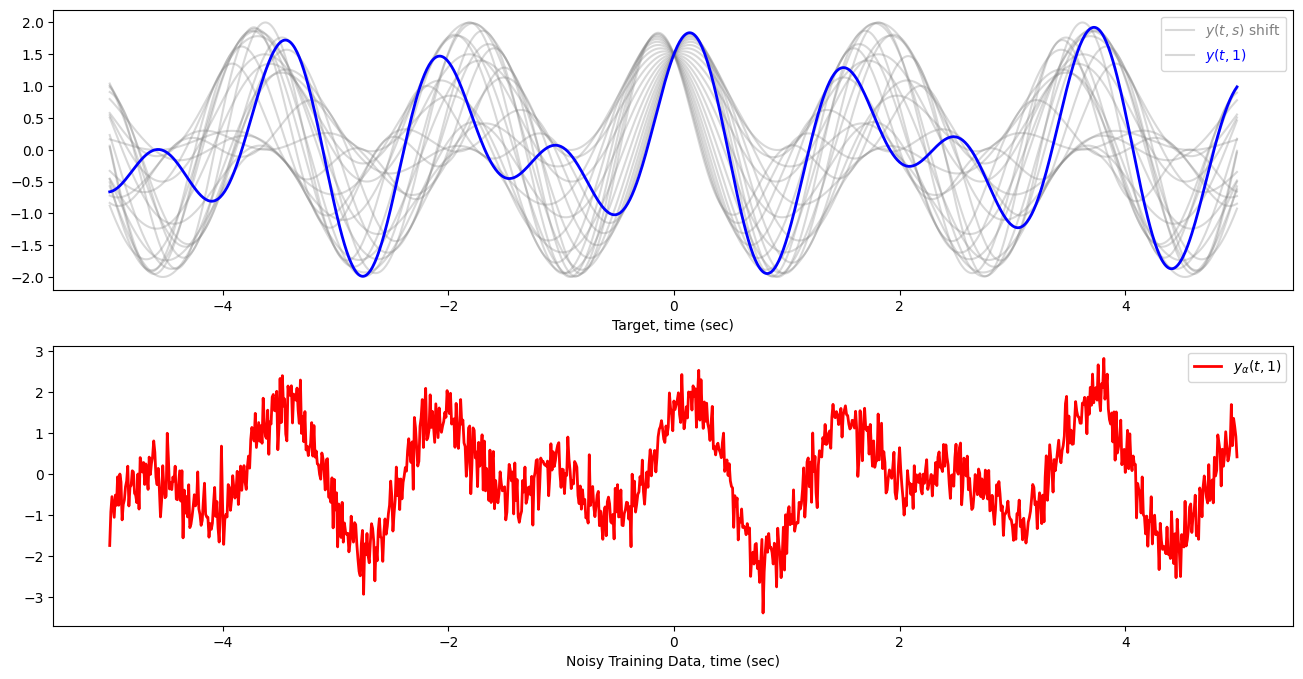

In [40]:
## SOLUTION REQUIRED IN THIS BLOCK ##

## Plotting simulated functional data

t_line = np.arange(-5., 5., 1/100.) # line space
alpha = 0.4
## Creating a function to produce cyclical y data.
y_func = lambda s: np.sin(np.sin(s)*2*np.pi*t_line + np.pi/6) + np.cos(2*np.sqrt(3)*t_line)
y = y_func(1)
## Adding noise
y_noisy = y + np.random.randn(len(t_line))*alpha
#


## Plotting
fig, ax = plt.subplots(2,1, figsize=(16,8))
fval = np.arange(-1,1,0.1)

for i in fval:
    ax[0].plot(t_line, y_func(i), color='gray', alpha=.3,label="$sin(f)$ shift")

ax[0].plot(t_line, y, lw = 2,label = "fixed $f$",color="b")
ax[0].set_xlabel('Target, time (sec)')
ax[1].plot(t_line, y_noisy, lw = 2,c="r")
ax[1].set_xlabel('Noisy Training Data, time (sec)')
ax[0].legend(["$y(t,s)$ shift","$y(t,1)$"],labelcolor=["gray","b"])
ax[1].legend(["$y_{\\alpha}(t,1)$"])


In the figure above we can see the true output of the generating function, given a specific value of $s$ (blue), and various drifts according to different values of $s$ (gray).  In the bottom plot you can see the noisy data (training),  matching the blue graph in the top plot.

### Creating PyTorch RNN model

Here we create a basic PyTorch RNN class (inherits from `nn.Module`).  

* *input_size* – The number of expected features (dimensions) in the input t

* *hidden_size* – The number of features in the hidden state h

* *num_layers* – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.    

* batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states.




For more information, please check the
[PyTorch nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) documentation.


In [41]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # Adding a fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden


In [42]:

# RNN Hyperparameters
input_size=1 # our data is 1-dim
output_size=1
hidden_dim=16
n_layers=2

# instantiate an RNN model
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


### RNN Training

Now we need to define a training function that takes the following hyper-parameters:  

* rnn : the RNN model object
* n_steps = on how many steps ($t$) to train the model (equivalent to "epochs").
* lag = the steps/datapoints lag between the training and target data.
* alpha = how much noise to add to the training data
* seq_length = how many datapoints  (time-series steps) to consider in each "epoch": $(t-k:t)$
* stride = the window size of the function (of which the seq_length will be divided).
* print_every = how often (in steps) to print a plot of the prediction against the target.

At each step, we have a lagged value of x, noisy lagged value of x (training), and a value of y (target not lagged).

P3Q2:  (5pts)

Fill out the missing code according to the function definition above

In [43]:
## SOLUTION REQUIRED IN THIS BLOCK##

# As above, creating a simulated data generator from our function (not noisy)
# this time, the function should depend on "step" as well (x_line is ever changing).

y_func = lambda s,t: np.sin(np.sin(s)*2*np.pi*t + np.pi/6) + np.cos(2*np.sqrt(3)*t)



In [44]:
# train the RNN
def train(rnn,y_func, n_steps, print_every,stride,seq_length,
          alpha,lag):
    # initialize the RNN hidden state
    hidden = None
    s = 1 # initialize f
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data

        # t_line = np.linspace(y_func(s,step),y_func(s,step)+stride,seq_length+stride)
        t_line =  np.linspace(step,step+stride, seq_length)
        data = y_func(s,t_line)
        noisy_data =  data + np.random.randn(len(t_line))*alpha
        # update f
        s += 0.05

        # prepare data for training
        data.resize((seq_length , 1)) # input_size=1
        noisy_data.resize((seq_length , 1)) # input_size=1
        # creating a lag in the noisy data aginst y
        x = noisy_data[:-lag]
        y = data[lag:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero out gradients
        optimizer.zero_grad()
        # calculate backprop and update weights
        loss.backward()
        optimizer.step()

        # plot loss and predictions
        if batch_i%print_every == 0:
            plt.plot(t_line[lag:], x, 'r.',label = "training")
            plt.plot(t_line[lag:], y, 'b.',label = "actual")
            plt.plot(t_line[lag:], prediction.data.numpy().flatten(), 'y.',label= "prediction") #
            plt.title("Loss: {:,}".format(loss.item()))
            plt.legend(loc="upper left")
            plt.show()

    return rnn

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

    
Train the RNN model on various hyper-parameters (defined below) and review the results.   


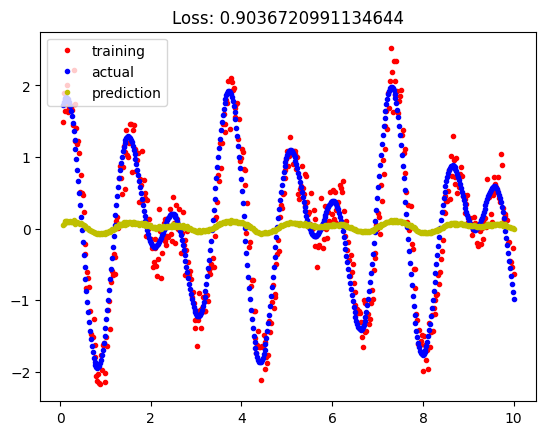

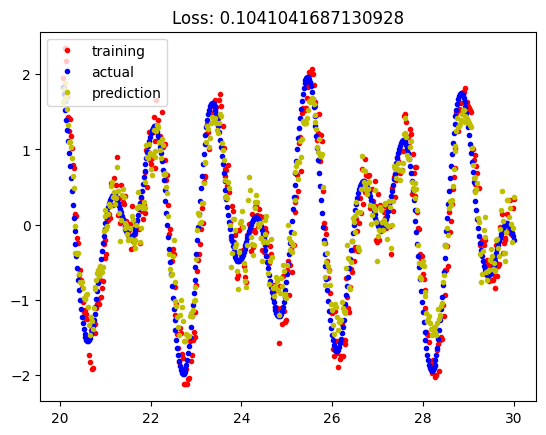

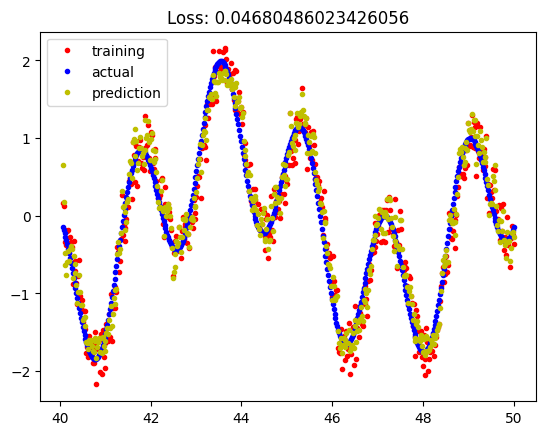

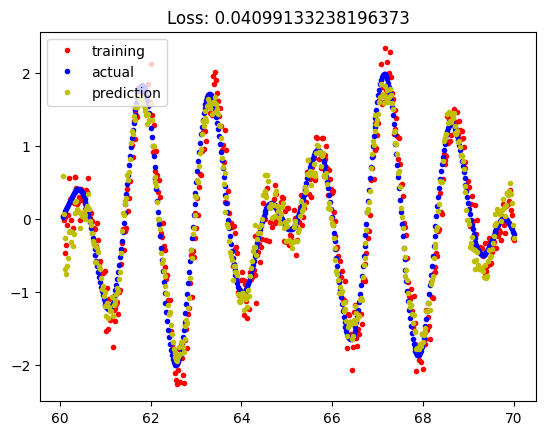

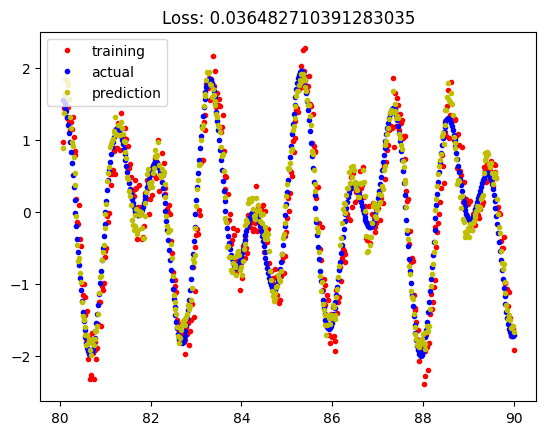

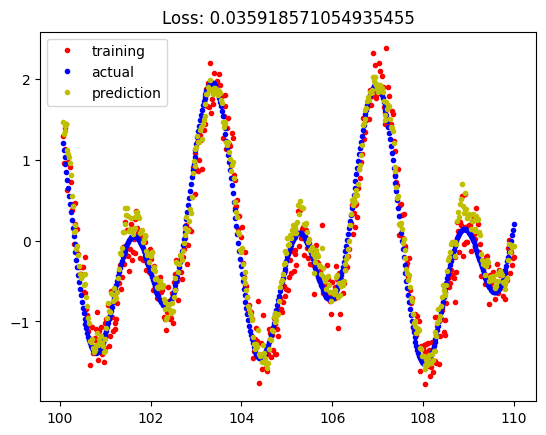

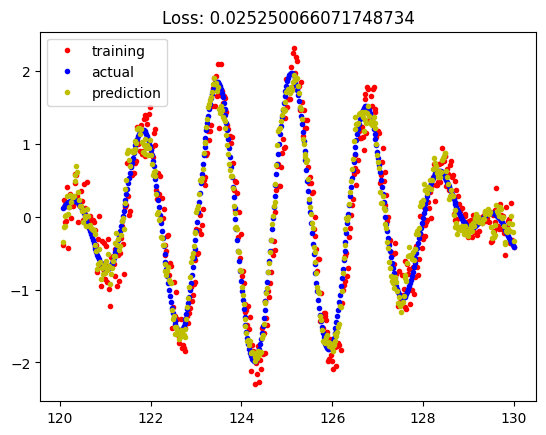

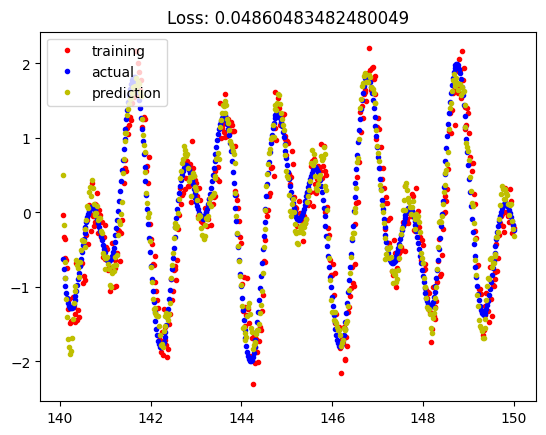

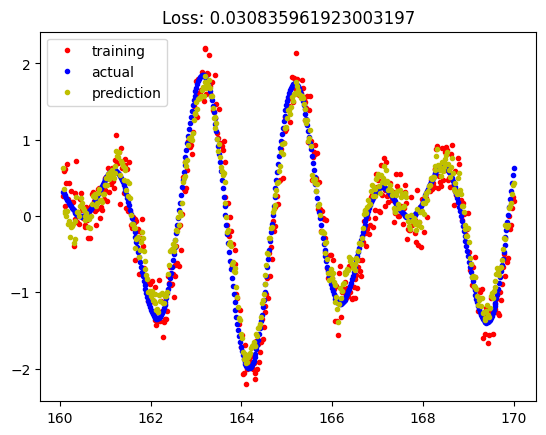

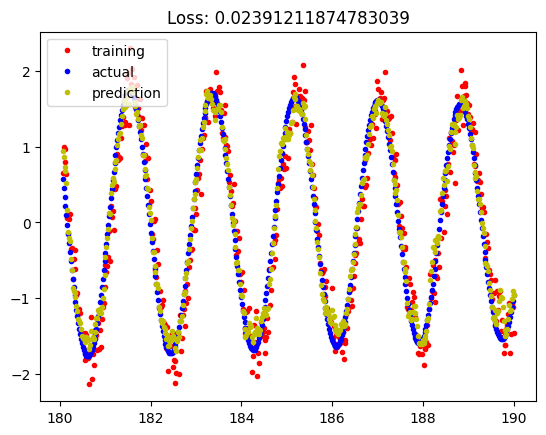

In [45]:

# train the rnn and monitor results

n_steps = 200
stride = 10
lag = 3
alpha = 0.2
seq_length = 500
print_every = 20

trained_rnn = train(rnn, y_func,  n_steps, print_every,
                    stride,seq_length,alpha,lag)

P3Q3: (10pts)

(a) Do you think our model performs well?     
(b) Write about the relationships and interplay between the different hyper-parameters, and explain how they effect the RNN model. Please relate also to the RNN architecture in our solution.

(c) Can you give a real world example where this type of model can be applied?   
(d) What would you change to improve it?

a) I think our model performs well, one is because after each printing (for every 20 steps) we get much better results, which means that our model fits to that problem.
Also the last predictions describes the model almost perfectly.

b) Lets go over the hyper-parameters:
  
  1. n_steps: Define how many training iterations will be, id the number will be too high we will get overfitting, and if to low the training might not be enough.
  2. stride: Control the spacing between each time point, if we have quick changing in the original function we would like to have less spacing to capture the change, else we would like bigger stride. can be think of the time passed between two samples.
  3. seq_length: The length of the training data, if we want to check longer temporal dependencies, we can set the length to be high, and if we want to check more local dependencies we can set the length to be small. Notice that if we have many training steps, and we also have small sequence and small stide, if the function is changing frequently we will have a very high overfitting to the data.
  4. lag: How long the The model must "remember" the information in
  𝑥 and use it to predict 𝑦, which appears later in the sequence.
  as higher the lag, the model needs to capture and retain information over a longer time span. This is usefull when future values depend also on far past states. Our function is recurrent so as i see it we dont need to have a very large lag value.
  5. alpha: std of the noise that is been added to the data, data with large noise tend to be harder to use for training, in the other hand it reduces the chance for overfitting to the original data. We use a small alpha so it will be easy to learn the original function.
  6. print_every: interval in which the training progress is displayed.

c) Yes, The model can be apply over stock price prediction, stock prices changing over time, and we can look at it as a time series of prices. We can also tune our hyperparameters to the specific problem, if we know that stock prices depend on far past prices we can use a high lag value, or if we know that stock prices tend to change very frequent and very fast we can use small stride and so.

d) Yes, i can use a bidirectional learning method thats allow the model to consider both past and future contexts for each training step. Thats how we can make more use from our data because we used it to have more information. Ofcourse it may cause even more overfitting.

ANSWER MISSING

THE END!